In [0]:
import pandas as pd
import numpy as np

import datetime
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.metrics import accuracy_score

In [2]:
cd '/content/drive/My Drive/Colab Notebooks/DW.Matrix/Matrix_Three/DW_Matrix_Road_Sign'

/content/drive/My Drive/Colab Notebooks/DW.Matrix/Matrix_Three/DW_Matrix_Road_Sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, Y_train = train['features'], train['labels']
X_test, Y_test = test['features'], test['labels']

In [4]:
len(np.unique(Y_train))

43

In [5]:
to_categorical(Y_train)[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [6]:
np.unique(Y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [0]:
if Y_train.ndim == 1:
  Y_train = to_categorical(Y_train)

if Y_test.ndim == 1:
  Y_test = to_categorical(Y_test)

In [0]:
Y_train.shape, X_train.shape[1:]
input_shape = X_train.shape[1:]
num_classes = Y_train.shape[1]

In [9]:
model = Sequential([
       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),             
       Flatten(),
       Dense(num_classes, activation = 'softmax')
])

#model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = 'accuracy')
model.fit(X_train, Y_train)

1088/1088 [==============================] - 5s 4ms/step - loss: 8.4707 - accuracy: 0.7814


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),             
       Flatten(),
       Dense(num_classes, activation = 'softmax')
  ])
  


def train_model(modl, X_train, Y_train, params_fit = {}):
  model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
  logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq = 1)
  
  model.fit(
      X_train, 
      Y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs', 5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train, Y_train)),
      callbacks = [tensorboard_callback]
  )
  return model


In [11]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, Y_train)

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 24.8154 - accuracy: 0.7440 - val_loss: 0.2701 - val_accuracy: 0.9382
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 0.2435 - accuracy: 0.9445 - val_loss: 0.2121 - val_accuracy: 0.9551
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1472 - accuracy: 0.9651 - val_loss: 0.0896 - val_accuracy: 0.9784
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1015 - accuracy: 0.9769 - val_loss: 0.0453 - val_accuracy: 0.9886
Epoch 5/5
272/272 [==============================] - 4s 16ms/step - loss: 0.0772 - accuracy: 0.9805 - val_loss: 0.0726 - val_accuracy: 0.9835


In [0]:
%tensorboard --logdir logs

In [12]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
       Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),             
       MaxPool2D(),
       Dropout(0.5),

       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),             
       MaxPool2D(),
       Dropout(0.3),
       Flatten(),
       Dense(1024, activation = 'relu'),
       Dropout(0.5),
       Dense(num_classes, activation = 'softmax')
  ])
  
get_cnn_v2(input_shape, num_classes).summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)             

In [13]:
model = get_cnn_v2(input_shape, num_classes)
params_fit = {
    'epochs' : 25
    }
logdir = train_model(model, X_train, Y_train, params_fit)

Epoch 1/25
272/272 [==============================] - 4s 14ms/step - loss: 9.9117 - accuracy: 0.0584 - val_loss: 3.4756 - val_accuracy: 0.0612
Epoch 2/25
272/272 [==============================] - 4s 13ms/step - loss: 3.1180 - accuracy: 0.1605 - val_loss: 2.9407 - val_accuracy: 0.1910
Epoch 3/25
272/272 [==============================] - 4s 13ms/step - loss: 2.6734 - accuracy: 0.2642 - val_loss: 1.9769 - val_accuracy: 0.4481
Epoch 4/25
272/272 [==============================] - 4s 13ms/step - loss: 1.9926 - accuracy: 0.4151 - val_loss: 1.4459 - val_accuracy: 0.5708
Epoch 5/25
272/272 [==============================] - 4s 13ms/step - loss: 1.5811 - accuracy: 0.5080 - val_loss: 1.0204 - val_accuracy: 0.6805
Epoch 6/25
272/272 [==============================] - 4s 13ms/step - loss: 1.2102 - accuracy: 0.6140 - val_loss: 0.7352 - val_accuracy: 0.7893
Epoch 7/25
272/272 [==============================] - 4s 13ms/step - loss: 0.9377 - accuracy: 0.7006 - val_loss: 0.4851 - val_accuracy: 0.8654

In [0]:
%tensorboard --logdir logs

In [14]:
Y_pred_prob = model_trained.predict(X_test)
Y_pred_prob

array([[2.4553478e-06, 5.8433920e-07, 3.4960336e-05, ..., 3.4715806e-05,
        3.8107933e-07, 5.5210063e-07],
       [9.6867261e-09, 1.7256165e-09, 1.9258781e-07, ..., 9.9107405e-05,
        1.0280226e-11, 1.4583653e-09],
       [3.7869083e-07, 6.9093424e-08, 2.2809672e-05, ..., 4.7536494e-05,
        9.9606932e-06, 1.3707709e-06],
       ...,
       [1.0274778e-02, 7.3229768e-03, 3.6320810e-03, ..., 7.6860175e-03,
        6.0520219e-03, 5.4374472e-03],
       [2.9436853e-03, 3.3042927e-03, 2.7721836e-03, ..., 1.4335169e-02,
        9.5424727e-03, 3.0417386e-03],
       [8.8740969e-03, 9.2978366e-03, 3.2909648e-03, ..., 3.8466691e-03,
        2.3518377e-03, 1.4461057e-03]], dtype=float32)

In [15]:
Y_pred_prob[0]

array([2.4553478e-06, 5.8433920e-07, 3.4960336e-05, 3.3770018e-06,
       5.1671739e-10, 1.8380762e-08, 9.3555808e-10, 6.3072987e-02,
       3.9282269e-03, 2.1031069e-02, 7.2916322e-08, 1.1511612e-05,
       9.1177458e-01, 1.6226144e-05, 3.1289306e-14, 1.9325664e-07,
       2.1701437e-06, 1.1433330e-16, 4.3929228e-11, 4.0902205e-11,
       3.3694210e-05, 7.3307023e-09, 1.9017267e-11, 1.3561147e-07,
       2.1717885e-09, 1.7231782e-13, 3.6253305e-06, 2.3733847e-07,
       3.7464799e-06, 1.7057692e-12, 1.2066475e-08, 3.5218068e-09,
       4.3523738e-05, 7.3447751e-07, 2.9183428e-10, 2.1473177e-07,
       1.0648098e-08, 1.7963689e-10, 5.2878840e-10, 1.2003475e-10,
       3.4715806e-05, 3.8107933e-07, 5.5210063e-07], dtype=float32)

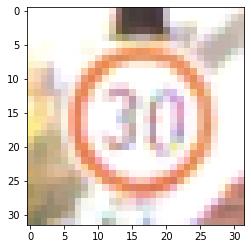

In [16]:
plt.imshow(X_test[400])

In [17]:
Y_pred_prob[400]

array([7.7201552e-03, 9.9197465e-01, 4.1027129e-06, 1.8187605e-07,
       3.0087106e-04, 8.7766175e-08, 9.3325022e-13, 2.4740882e-10,
       3.1083725e-18, 5.6051848e-09, 4.8088433e-11, 2.0165426e-15,
       2.5733136e-20, 3.2256052e-11, 2.4895804e-11, 1.3843463e-16,
       1.6782398e-14, 1.6329811e-18, 2.7365813e-14, 1.3452717e-29,
       3.0112111e-17, 9.6074691e-24, 2.5894584e-31, 6.8583055e-21,
       4.4277774e-17, 8.0072244e-15, 1.8672504e-26, 7.1265085e-28,
       9.7077270e-21, 5.4603243e-16, 8.8165716e-18, 1.0841200e-13,
       6.2524725e-21, 2.3202842e-21, 9.4574926e-20, 4.4499914e-18,
       6.9779278e-22, 2.1897278e-24, 2.7153949e-17, 1.5649916e-34,
       3.3567366e-18, 2.8694654e-15, 7.8031162e-21], dtype=float32)

In [18]:
ls data

signnames.csv  test.p  train.p


In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [20]:
labels_dict[np.argmax(Y_pred_prob[400])]

'Speed limit (30km/h)'

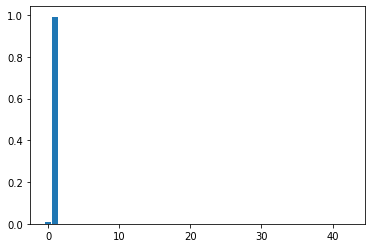

In [21]:
plt.bar(range(43), Y_pred_prob[400]);

In [0]:
def predict(model_trained, X_test, Y_test, scoring = accuracy_score):
  Y_pred_prob = model_trained.predict(X_test)
  Y_pred = np.argmax(Y_pred_prob, axis = 1)
  Y_test_norm = np.argmax(Y_test, axis = 1)
  return scoring(Y_test_norm, Y_pred)

In [23]:
predict(model_trained, X_test, Y_test)

0.8217687074829932

In [0]:
def train_and_predict(model):
  model = get_cnn_v3(input_shape, num_classes)
  model_trained = train_model(model, X_train, Y_train)
  return predict(model_trained, X_test, Y_test)

In [25]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
       Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),             
       MaxPool2D(),
       Dropout(0.3),

       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),
       MaxPool2D(),
       Dropout(0.3),

       Flatten(),
       Dense(1024, activation = 'softmax'),
       Dropout(0.3)
  ])

train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2525 - accuracy: 0.9340 - val_loss: 0.0304 - val_accuracy: 0.9921
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2665 - accuracy: 0.9292 - val_loss: 0.0267 - val_accuracy: 0.9939
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2515 - accuracy: 0.9324 - val_loss: 0.0200 - val_accuracy: 0.9958
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2526 - accuracy: 0.9334 - val_loss: 0.0330 - val_accuracy: 0.9914
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2468 - accuracy: 0.9342 - val_loss: 0.0383 - val_accuracy: 0.9898


0.9301587301587302

In [26]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
       Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),             
       MaxPool2D(),
       Dropout(0.3),

       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
       MaxPool2D(),
       Dropout(0.3),

       Flatten(),
       
       Dense(1024, activation = 'relu'),
       Dropout(0.3),

       Dense (num_classes, activation = 'softmax')
  ])

train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2468 - accuracy: 0.9374 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2426 - accuracy: 0.9422 - val_loss: 0.0197 - val_accuracy: 0.9956
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2941 - accuracy: 0.9305 - val_loss: 0.0262 - val_accuracy: 0.9940
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2442 - accuracy: 0.9388 - val_loss: 0.0192 - val_accuracy: 0.9953
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2316 - accuracy: 0.9413 - val_loss: 0.0197 - val_accuracy: 0.9950


0.9247165532879819

In [27]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
       Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),             
       Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),             
       MaxPool2D(),
       Dropout(0.3),

       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
       MaxPool2D(),
       Dropout(0.3),

       Flatten(),
       
       Dense(1024, activation = 'relu'),
       Dropout(0.3),

       Dense (num_classes, activation = 'softmax')
  ])

train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2344 - accuracy: 0.9439 - val_loss: 0.0137 - val_accuracy: 0.9974
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2490 - accuracy: 0.9397 - val_loss: 0.0367 - val_accuracy: 0.9922
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2564 - accuracy: 0.9400 - val_loss: 0.0262 - val_accuracy: 0.9935
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2373 - accuracy: 0.9437 - val_loss: 0.0229 - val_accuracy: 0.9935
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2506 - accuracy: 0.9392 - val_loss: 0.0214 - val_accuracy: 0.9954


0.9192743764172335

In [28]:
def get_cnn_v6(input_shape, num_classes):
  return Sequential([
       Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),             
       Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'),             
       MaxPool2D(),
       Dropout(0.3),

       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
       MaxPool2D(),
       Dropout(0.3),

       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
       MaxPool2D(),
       Dropout(0.3),

       Flatten(),
       
       Dense(1024, activation = 'relu'),
       Dropout(0.3),

       Dense (num_classes, activation = 'softmax')
  ])
#get_cnn_v6(input_shape, num_classes).summary()
train_and_predict(get_cnn_v6(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2674 - accuracy: 0.9427 - val_loss: 0.0250 - val_accuracy: 0.9931
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2976 - accuracy: 0.9379 - val_loss: 0.0255 - val_accuracy: 0.9941
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2320 - accuracy: 0.9476 - val_loss: 0.0209 - val_accuracy: 0.9948
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2414 - accuracy: 0.9444 - val_loss: 0.0132 - val_accuracy: 0.9974
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2859 - accuracy: 0.9402 - val_loss: 0.0178 - val_accuracy: 0.9958


0.9403628117913833

In [29]:
def get_cnn_v7(input_shape, num_classes):
  return Sequential([
       Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),             
       Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'),             
       MaxPool2D(),
       Dropout(0.3),

       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
       MaxPool2D(),
       Dropout(0.3),

       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
       Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
       MaxPool2D(),
       Dropout(0.3),

       Flatten(),
       
       Dense(1024, activation = 'relu'),
       Dropout(0.3),

       Dense(1024, activation = 'relu'),
       Dropout(0.3),

       Dense (num_classes, activation = 'softmax')
  ])
#get_cnn_v6(input_shape, num_classes).summary()
train_and_predict(get_cnn_v7(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2541 - accuracy: 0.9430 - val_loss: 0.0143 - val_accuracy: 0.9969
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2914 - accuracy: 0.9421 - val_loss: 0.0218 - val_accuracy: 0.9933
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2407 - accuracy: 0.9498 - val_loss: 0.0093 - val_accuracy: 0.9974
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3192 - accuracy: 0.9374 - val_loss: 0.0287 - val_accuracy: 0.9923
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2849 - accuracy: 0.9391 - val_loss: 0.0254 - val_accuracy: 0.9939


0.9201814058956916

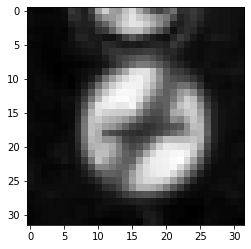

In [30]:
plt.imshow(color.rgb2gray(X_train[0]), cmap = plt.get_cmap('gray'));

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [32]:
model = get_cnn_v7((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, Y_train, params_fit = {})
predict(model_trained, X_test_gray, Y_test)

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.4258 - accuracy: 0.3106 - val_loss: 0.6938 - val_accuracy: 0.7843
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.5676 - accuracy: 0.8162 - val_loss: 0.1435 - val_accuracy: 0.9569
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2532 - accuracy: 0.9202 - val_loss: 0.0692 - val_accuracy: 0.9793
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1692 - accuracy: 0.9470 - val_loss: 0.0419 - val_accuracy: 0.9876
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1272 - accuracy: 0.9607 - val_loss: 0.0337 - val_accuracy: 0.9914


0.9671201814058957

In [33]:
X_train[0].shape

(32, 32, 3)

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
  img = color.hsv2rgb(hsv)
  return img

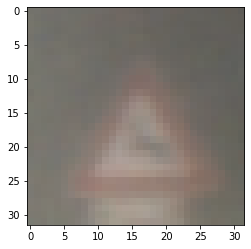

In [35]:
plt.imshow(X_train[400]);

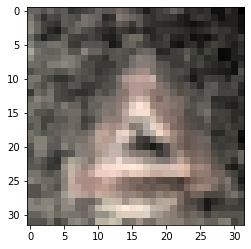

In [36]:
plt.imshow(preproc_img(X_train[400]));

In [0]:
#X_train_prp = X_train.copy().astype(np.float32)
#X_test_prp = X_test.copy().astype(np.float32)

#for i in tqdm(range(X_train.shape[0])):
#  X_train_prp[i] = preproc_img(X_train[i])

#for i in tqdm(range(X_test.shape[0])):
#  X_test_prp[i] = preproc_img(X_test[i])